In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-genome/ncbi_datasets.csv


In [2]:
import pandas as pd

metadata = pd.read_csv('/kaggle/input/covid-genome/ncbi_datasets.csv')

/tmp/ipykernel_23/1292894578.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/kaggle/input/covid-genome/ncbi_datasets.csv')


In [3]:
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [4]:
metadata.shape

(847791, 16)

In [5]:
metadata.columns

Index(['Nucleotide Accession', 'Species Taxonomy Id', 'Species Name',
       'Virus Genus', 'Virus Family', 'Isolate Name', 'Nucleotide Length',
       'Sequence Type', 'Nuc Completeness', 'Geo Location', 'US State',
       'Host Name', 'Host Taxonomy ID', 'Collection Date', 'BioProject',
       'BioSample'],
      dtype='object')

In [6]:
metadata.index

RangeIndex(start=0, stop=847791, step=1)

In [7]:
metadata.dtypes

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

In [8]:
metadata["Collection Date"].dtypes

dtype('O')

In [9]:
metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"], errors="coerce", infer_datetime_format=True)

/tmp/ipykernel_23/89245147.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"], errors="coerce", infer_datetime_format=True)


In [10]:
metadata.columns = [c.lower().replace(" ","_") for c in metadata.columns]

In [11]:
metadata.columns

Index(['nucleotide_accession', 'species_taxonomy_id', 'species_name',
       'virus_genus', 'virus_family', 'isolate_name', 'nucleotide_length',
       'sequence_type', 'nuc_completeness', 'geo_location', 'us_state',
       'host_name', 'host_taxonomy_id', 'collection_date', 'bioproject',
       'biosample'],
      dtype='object')

In [12]:
metadata["continent"] = metadata["geo_location"].str.replace(";.+","",regex=True)

In [13]:
metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])

/tmp/ipykernel_23/4072638154.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL913312.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/KEN/NIC_084/2020,29782,GenBank,complete,Africa; Kenya,NaN,NaN,9606,2020-03-01,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,MT270105.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/DEU/BavPat5-ChVir1248/2020,29860,GenBank,complete,Europe; Germany: Bavaria,NaN,NaN,9606,2020-01-01,NaN,NaN,Europe
North America,MT951951.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/VA-DCLS-0583/2020,29882,GenBank,complete,North America; USA: Virginia,NaN,NaN,9606,2020-03-01,NaN,NaN,North America
Oceania,MZ331924.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/NZL/20VR1275/2020,29782,GenBank,complete,Oceania; New Zealand,NaN,NaN,9606,NaT,PRJNA648792,SAMN15769785,Oceania
South America,MT670015.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHL/2020-25343/2020,29782,GenBank,complete,South America; Chile,NaN,NaN,9606,NaT,NaN,NaN,South America


In [14]:
metadata["continent"].value_counts()

continent
North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: count, dtype: int64

In [15]:
metadata["nucleotide_length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [16]:
metadata[metadata["nucleotide_length"] == metadata["nucleotide_length"].min()]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,NaT,PRJEB39632,SAMEA7098098,Europe


In [17]:
sample_month = pd.Series(metadata["collection_date"].values.astype("<M8[M]"))

<Axes: >

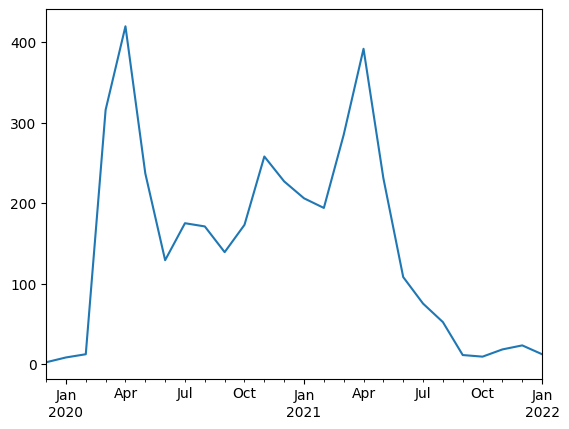

In [18]:
sample_month.value_counts().sort_index().plot()

In [19]:
metadata[metadata["sequence_type"] == "RefSeq"]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


In [20]:
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]

/tmp/ipykernel_23/3963990289.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,NaT,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [21]:
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]

/tmp/ipykernel_23/1462966699.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [22]:
import os

sequences = ["NC_045512.2", "OL467832.1", "OM061695.1", "OM095411.1"]
human_names = ["reference", "base", "delta", "omicron"]

In [23]:
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]

In [24]:
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,NaT,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [25]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from Bio import Entrez
Entrez.email = "resourcebyte.shrivastava@gmail.com"

In [27]:
def download_sequence(id_code):
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [28]:
sequence_data = {}
for sequence in sequences:
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}

In [29]:
from Bio import SeqIO
import io

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]

In [30]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [31]:
sequence_data["OM095411.1"]["parsed"]

SeqRecord(seq=Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG...AGC'), id='OM095411.1', name='OM095411.1', description='OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome', dbxrefs=[])

In [32]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [33]:
aligner.algorithm

'Needleman-Wunsch'

In [34]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
score

29818.0

In [35]:
import numpy as np

comparisons = np.zeros((4,4))

for i in range(0,4):
    for j in range(0,i+1):
        score =aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [36]:
comparison_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

In [37]:
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [38]:
comparison_df.iloc[:,0] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

In [39]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
delta_alignments = aligner.align(seq1, seq2)

In [40]:
delta_alignments

In [41]:
delta_alignment = delta_alignments[0]

In [42]:
delta_alignment.shape

(2, 29943)

In [43]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 